<a href="https://colab.research.google.com/github/Peiqiiiii/Customer-Ratings-Analysis-/blob/main/Customer_Ratings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content of Table

(The clickable links only work in Jupyter Notebook.)

- [Motivation ](#Motivation )  
- [Introducation](#Introducation)  
- [Conclusion](#Conclusion )  
- [Dataset introduction](#Dataset-introduction)  
- [Exploration](#Exploration)  
 - [Basic Exploration](#Basic-Exploration )
   - [Customer-Related Features](#Customer-related-features )
   - [Restaurant-Related Features](#Restaurant-related-features )
   
 - [Advanced Exploration-Machine Learning](#Advanced-Exploration---Machine-Learning )


# Motivation

Restaurants are omnipresent, serving a spectrum of customer needs, from satisfying hunger to crafting memorable dining experiences. When visiting a restaurant for the primary goal of satiating hunger, customers tend to value convenience, while those seeking a delightful dining experience may place more emphasis on factors such as food quality, service, and ambiance. Grasping these factors that drive customer satisfaction is pivotal for the prosperity of any restaurant. Through the comprehensive analysis of customer datasets, we can glean profound insights into customer preferences, thereby enabling restaurants to tailor their offerings more effectively and increase revenue.

# Introducation  

In this study, we analyzed data from 138 Mexican restaurants along with ratings provided by 130 customers. Our primary objective was to comprehend the factors that influence customer satisfaction. Initially, we examined the distribution of customer ratings for each feature in the dataset to gain insights into the relationships between features and the average rating.Lastly, we employed machine learning techniques to identify the most influential features for predicting ratings. This final step assists us in uncovering the essential elements that contribute to the overall rating of a restaurant.

# Conclusion

From a customer profile perspective, our analysis revealed certain features that exhibit significant differences in average ratings across groups. Notably, attributes like 'smoker', 'drink_level', 'dress_preference', and 'transport' showcase notable contrasts in average ratings. For instance, the average rating differs significantly between smoker and non-smoker groups. Shifting the focus to the restaurant context, we identified that the average ratings vary significantly across groups in features such as 'city', 'state', 'dress_code', and 'price'.

Employing the SequentialFeatureSelector in a greedy manner led to the selection of features that optimize model performance to predict ratings. Specifically, 'match_parking_lot', 'parking_lot', 'userID', 'transport', 'marital_status', 'personality', 'religion', and 'activity' were chosen. Our analysis underscores the importance of parking facilities provided by restaurants, particularly when customers possess cars. This attribute emerges as crucially associated with restaurant ratings. We suggest that if a restaurant's customer profile predominantly comprises individuals with cars, ensuring convenient parking services is vital for enhancing customer satisfaction. This recommendation is especially pertinent for restaurants located in areas with limited public transportation accessibility.

In [ ]:
# Loading packages and define functions will be used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
filenames=['AcceptPayment.csv','CuisineType.csv','Openhour.csv','Parking.csv','geoplaces.csv','rating_final.csv',
          'usercuisine.csv','userpayment.csv','userprofile.csv']

In [ ]:
AcceptPayment=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/AcceptPayment.csv")
CuisineType=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/CuisineType.csv")
Openhour=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/Openhour.csv")
Parking=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/Parking.csv")
geoplaces=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/geoplaces.csv")
rating_final=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/rating_final.csv")
usercuisine=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/usercuisine.csv")
userpayment=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/userpayment.csv")
userprofile=pd.read_csv("/Users/peiqichen/Desktop/890project/Dataset/userprofile.csv")

In [ ]:
def print_bold(text):
    print("\033[1m" + text + "\033[0m")

The show_dataset_detail function will display detailed information about the dataset, including dataset.head(), its shape, missing values, the data types of the dataset columns, and the value_counts() of each categorical variable.

In [ ]:
def show_dataset_detail(datasetname):
    dataset=dataset_dic[datasetname]
    print_bold('##{}##'.format(datasetname))
    print('')
    print(dataset.head())
    print('')
    print_bold("The shape is {}".format(dataset.shape))
    print('')
    print_bold('The missing value distribution:')
    print(dataset.isna().sum())
    print('')
    print_bold('The dypes distribution:')
    print(dataset.dtypes.value_counts())
    print('')
    for column in dataset.columns:
        if column=='placeID':
            dataset.loc[:, 'placeID'] = dataset['placeID'].astype('object')
        if dataset[column].dtypes=='object'or dataset[column].dtypes=='O':
            print_bold('{} variable distribution'.format(column))
            print(dataset[column].value_counts())
            print('')
        else:
            unique=dataset[column].nunique()
            print_bold('{} has {} uniuqe number,Dataset #row is {}'.format(column,unique,dataset.shape[0]))
            print('')

In [ ]:
# keep only the restaurants that were rated by the customers
def keep_rated_restaurant(dataset):
    dataset = dataset.loc[dataset['placeID'].isin(rating_final['placeID'].unique())]
    return dataset

Define the function to calculate the p-value of the difference in ratings between groups.

In [ ]:
# pip install scipy numpy
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# calculate the p-value of difference of groups
def group_Ratingdifference_Pvalue(column,dataset):
    levels=dataset[column].dropna().unique()
    levels=levels.tolist()

    category_dict={}
    i=1
    p_value=None
    for level in levels:
        category_dict['group_{}'.format(i)]=dataset[dataset[column]==level]['rating']
        i=i+1

    if len(category_dict)==2:
        statistic, p_value = ttest_ind(category_dict['group_1'], category_dict['group_2'], equal_var=False)

    if len(category_dict)>2:
        groups_data=list(category_dict.values())
        statistic, p_value = f_oneway(*groups_data)

    return p_value

In [ ]:
dataset_dic = {
    'AcceptPayment': AcceptPayment,
    'CuisineType': CuisineType,
    'Openhour': Openhour,
    'Parking': Parking,
    'geoplaces': geoplaces,
    'rating_final': rating_final,
    'usercuisine': usercuisine,
    'userpayment': userpayment,
    'userprofile': userprofile,
}

# Dataset introduction

[Back to content of table](#Content-of-Table)

Use the content table to jump to the corresponding dataset introduction  

[AcceptPayment](#AcceptPayment)  
[CuisineType](#CuisineType)    
[Openhour](#Openhour)  
[Parking](#Parking)  
[geoplaces](#geoplaces)  
[rating_final](#rating_final)  
[usercuisine](#usercuisine)  
[userpayment](#userpayment)  
[userprofile](#userprofile)

## AcceptPayment

[Back to content of dataset](#Dataset-introduction)

The dataset contain the what payment method the restaurants accept.

In [ ]:
show_dataset_detail('AcceptPayment')

##AcceptPayment##

   placeID             Rpayment
0   135110                 cash
1   135110                 VISA
2   135110  MasterCard-Eurocard
3   135110     American_Express
4   135110     bank_debit_cards

The shape is (1314, 2)

The missing value distribution:
placeID     0
Rpayment    0
dtype: int64

The dypes distribution:
int64     1
object    1
dtype: int64

placeID variable distribution
132289    8
132592    7
132231    7
132187    7
132243    6
         ..
132847    1
132848    1
132849    1
132850    1
132805    1
Name: placeID, Length: 615, dtype: int64

Rpayment variable distribution
cash                   500
MasterCard-Eurocard    194
VISA                   172
American_Express       153
bank_debit_cards       130
Visa                    83
Diners_Club             42
Discover                11
checks                  10
Carte_Blanche            7
gift_certificates        7
Japan_Credit_Bureau      5
Name: Rpayment, dtype: int64



In [ ]:
AcceptPayment = keep_rated_restaurant(AcceptPayment)
dataset_dic['AcceptPayment']=AcceptPayment

## CuisineType

[Back to content of dataset](#Dataset-introduction)

The CuisineType contains information about types of cuisine provided by the restaurants. The dominant type is Mexican in this dataset.

In [ ]:
show_dataset_detail('CuisineType')

##CuisineType##

   placeID        Rcuisine
0   135110         Spanish
1   135109         Italian
2   135107  Latin_American
3   135106         Mexican
4   135105       Fast_Food

The shape is (916, 2)

The missing value distribution:
placeID     0
Rcuisine    0
dtype: int64

The dypes distribution:
int64     1
object    1
dtype: int64

placeID variable distribution
132774    9
135099    6
135097    6
135103    4
135098    4
         ..
132768    1
132767    1
132766    1
132765    1
132001    1
Name: placeID, Length: 769, dtype: int64

Rcuisine variable distribution
Mexican                 239
International            62
American                 59
Dutch-Belgian            55
Italian                  42
Greek                    33
Bar                      32
French                   31
Cafe-Coffee_Shop         27
Pizzeria                 25
Bar_Pub_Brewery          24
Cafeteria                23
Chinese                  21
Fast_Food                20
Seafood                  18
Japane

In [ ]:
CuisineType = keep_rated_restaurant(CuisineType)
dataset_dic['CuisineType']=CuisineType

## Openhour

[Back to content of dataset](#Dataset-introduction)

The dataset contains the information of the open hour of the restaurant,most of them open for 24 hours,2/3 of them open on weekend.

In [ ]:
show_dataset_detail('Openhour')

##Openhour##

   placeID         hours                  days
0   135111  00:00-23:30;  Mon;Tue;Wed;Thu;Fri;
1   135111  00:00-23:30;                  Sat;
2   135111  00:00-23:30;                  Sun;
3   135110  08:00-19:00;  Mon;Tue;Wed;Thu;Fri;
4   135110  00:00-00:00;                  Sat;

The shape is (2339, 3)

The missing value distribution:
placeID    0
hours      0
days       0
dtype: int64

The dypes distribution:
object    2
int64     1
dtype: int64

placeID variable distribution
132498    12
132148    10
132275     8
132012     6
132318     6
          ..
132829     3
132409     2
132026     2
132518     2
132536     2
Name: placeID, Length: 694, dtype: int64

hours variable distribution
00:00-23:30;    681
00:00-00:00;    100
17:00-22:00;     56
14:00-23:30;     32
09:00-23:30;     31
               ... 
19:00-00:30;      1
07:00-18:30;      1
01:00-01:00;      1
20:30-20:30;      1
10:30-20:00;      1
Name: hours, Length: 273, dtype: int64

days variable distribution
Mo

In [ ]:
Openhour = keep_rated_restaurant(Openhour)
dataset_dic['Openhour']=Openhour

## Parking

[Back to content of dataset](#Dataset-introduction)

The dataset contains information about parking facilities provided by restaurants. Oonly half of the restaurants offer parking services, while the other half do not provide parking facilities.

In [ ]:
show_dataset_detail('Parking')

##Parking##

   placeID parking_lot
0   135111      public
1   135110        none
2   135109        none
3   135108        none
4   135107        none

The shape is (702, 2)

The missing value distribution:
placeID        0
parking_lot    0
dtype: int64

The dypes distribution:
int64     1
object    1
dtype: int64

placeID variable distribution
132243    3
132012    2
132184    2
132409    2
132399    2
         ..
132953    1
132951    1
132950    1
132948    1
132840    1
Name: placeID, Length: 675, dtype: int64

parking_lot variable distribution
none                 348
yes                  174
public               102
street                32
fee                   22
valet parking         21
validated parking      3
Name: parking_lot, dtype: int64



In [ ]:
Parking = keep_rated_restaurant(Parking)
dataset_dic['Parking']=Parking

## geoplaces

[Back to content of dataset](#Dataset-introduction)

The dataset contains geo information of the restaurants, including latitude, longitude, city, and more. Additionally, it provides features about the smoking area, dressing code, etc. However, we noticed that only 130 restaurants have geo information available.

Cleaning needed:

- The '?' sign was used to represent missing values in dataset, need to replace it with NaN.
- The 'city' variable has inconsistencies like 'San Luis Potosi' being inputted as 'san luis potosi', 's.l.p. ', 'slp', 'san luis potos', 'san luis potosi', 's.l.p'.
- The 'state' variable also suffers from similar issues as the 'city'.
- The 'country' variable 'Mexico' is also inputted in various forms, such as 'mexico'.
- We drop the following columns: the_geom_meter, name, address, fax, zipcode,country,and url. These columns are neither entirely empty/sharing overlap info nor relevant to the research questions.


Cleaning process is showned after dataset details.

In [ ]:
show_dataset_detail('geoplaces')

##geoplaces##

   placeID   latitude   longitude  \
0   134999  18.915421  -99.184871   
1   132825  22.147392 -100.983092   
2   135106  22.149709 -100.976093   
3   132667  23.752697  -99.163359   
4   132613  23.752903  -99.165076   

                                      the_geom_meter  \
0  0101000020957F000088568DE356715AC138C0A525FC46...   
1  0101000020957F00001AD016568C4858C1243261274BA5...   
2  0101000020957F0000649D6F21634858C119AE9BF528A3...   
3  0101000020957F00005D67BCDDED8157C1222A2DC8D84D...   
4  0101000020957F00008EBA2D06DC8157C194E03B7B504E...   

                             name                                 address  \
0                 Kiku Cuernavaca                              Revolucion   
1                 puesto de tacos  esquina santos degollado y leon guzman   
2      El Rinc�n de San Francisco                         Universidad 169   
3  little pizza Emilio Portes Gil                 calle emilio portes gil   
4                   carnitas_mata       

In [ ]:
## simple cleaning of geoplace mentioned above

In [ ]:
geoplaces=geoplaces.replace('?',pd.NA)

geoplaces['city'] = geoplaces['city'].str.strip()
geoplaces['city']=geoplaces['city'].replace(['San Luis Potosi','san luis potosi','san luis potosi',
                             'slp','S.L.P.','s.l.p.','san luis potos','s.l.p','san luis potosi'],'San Luis Potosi')
geoplaces['city']=geoplaces['city'].replace(['victoria',r'.*victoria.*','Ciudad Victoria','Cd. Victoria','Cd Victoria'],'Ciudad Victoria')
geoplaces['city']=geoplaces['city'].replace(['Cuernavaca','cuernavaca'],'Cuernavaca',regex=True)


geoplaces['state']=geoplaces['state'].replace(['San Luis Potosi','SLP','san luis potosi','san luis potosi',
                             'slp','S.L.P.','s.l.p.','san luis potos','s.l.p','san luis potosi'],'San Luis Potosi')
geoplaces['state']=geoplaces['state'].replace(['morelos'],'Morelos')
geoplaces['state']=geoplaces['state'].replace(['tamaulipas'],'Tamaulipas')
geoplaces['state']=geoplaces['state'].replace(['mexico'],'Mexico')


geoplaces['country']=geoplaces['country'].replace(['mexico'],'Mexico')

geoplaces = geoplaces.drop(columns=['the_geom_meter','name','address','fax','zip','url','country'],axis=1)


dataset_dic['geoplaces']=geoplaces


## rating_final

[Back to content of dataset](#Dataset-introduction)

Rating is our target variables.The dataset contains the ratings of users for restaurants. There are 138 judges, each of whom rated 3 to 18 restaurants.Eeach of the returants were rated at least 3 times. However, only 130 restaurants have ratings. The scale of the ratings is from 0 to 2,include values 0,1,2.

In [ ]:
show_dataset_detail('rating_final')

##rating_final##

  userID  placeID  rating  food_rating  service_rating
0  U1077   135085       2            2               2
1  U1077   135038       2            2               1
2  U1077   132825       2            2               2
3  U1077   135060       1            2               2
4  U1068   135104       1            1               2

The shape is (1161, 5)

The missing value distribution:
userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

The dypes distribution:
int64     4
object    1
dtype: int64

userID variable distribution
U1106    18
U1061    18
U1134    16
U1024    15
U1135    14
         ..
U1021     3
U1017     3
U1074     3
U1047     3
U1011     3
Name: userID, Length: 138, dtype: int64

placeID variable distribution
135085    36
132825    32
135032    28
135052    25
132834    25
          ..
135011     3
132717     3
134975     3
132668     3
132766     3
Name: placeID, Length: 130, dtype: int64

ra

How many different customers rated a resturant?After gourping by,we know that each rating of a resturants was given by different customers.  
(Logic : the number of rating given = number of unique userID within the group)

In [ ]:
rating_final.groupby('placeID')['userID'].count().sort_values()

placeID
135011     3
132668     3
134975     3
132766     3
135016     3
          ..
135052    25
132834    25
135032    28
132825    32
135085    36
Name: userID, Length: 130, dtype: int64

## usercuisine

[Back to content of dataset](#Dataset-introduction)

The dataset shows the cuisine preferences of customers, with a total of 138 customers. Interestingly, one customer can have multiple preferred cuisine types, with a maximum of 103 different types of cuisine. Most of the customers have Mexican cuisine as their preferred type

In [ ]:
show_dataset_detail('usercuisine')

##usercuisine##

  userID          Rcuisine
0  U1001          American
1  U1002           Mexican
2  U1003           Mexican
3  U1004            Bakery
4  U1004  Breakfast-Brunch

The shape is (330, 2)

The missing value distribution:
userID      0
Rcuisine    0
dtype: int64

The dypes distribution:
object    2
dtype: int64

userID variable distribution
U1135    103
U1108     18
U1101     15
U1016     14
U1060     13
        ... 
U1046      1
U1044      1
U1043      1
U1042      1
U1138      1
Name: userID, Length: 138, dtype: int64

Rcuisine variable distribution
Mexican             97
American            11
Cafeteria            9
Pizzeria             9
Cafe-Coffee_Shop     8
                    ..
Persian              1
Ethiopian            1
Romanian             1
Cambodian            1
Southern             1
Name: Rcuisine, Length: 103, dtype: int64



In [ ]:
usercuisine[usercuisine['userID']=='U1135']['Rcuisine'].nunique()

103

## userpayment

[Back to content of dataset](#Dataset-introduction)

The dataset show how the customer paid their bills,most of them used cash

In [ ]:
show_dataset_detail('userpayment')

##userpayment##

  userID          Upayment
0  U1001              cash
1  U1002              cash
2  U1003              cash
3  U1004              cash
4  U1004  bank_debit_cards

The shape is (177, 2)

The missing value distribution:
userID      0
Upayment    0
dtype: int64

The dypes distribution:
object    2
dtype: int64

userID variable distribution
U1041    4
U1044    4
U1116    3
U1077    3
U1076    3
        ..
U1047    1
U1046    1
U1045    1
U1043    1
U1138    1
Name: userID, Length: 133, dtype: int64

Upayment variable distribution
cash                   131
bank_debit_cards        22
VISA                    17
MasterCard-Eurocard      4
American_Express         3
Name: Upayment, dtype: int64



In [ ]:
userpayment['Upayment']=userpayment['Upayment'].str.replace(" ",'')
dataset_dic['userpayment']=userpayment

## userprofile

[Back to content of dataset](#Dataset-introduction)

The dataset contains information of user profile about their life habit ,marital_status,birth_year,interest and so on.

Cleaning needed.
- We need to covert the '?'  to NaN.

In [ ]:
show_dataset_detail('userprofile')

##userprofile##

  userID   latitude   longitude smoker     drink_level dress_preference  \
0  U1001  22.139997 -100.978803  false      abstemious         informal   
1  U1002  22.150087 -100.983325  false      abstemious         informal   
2  U1003  22.119847 -100.946527  false  social drinker           formal   
3  U1004  18.867000  -99.183000  false      abstemious         informal   
4  U1005  22.183477 -100.959891  false      abstemious    no preference   

  ambience transport marital_status        hijos  birth_year    interest  \
0   family   on foot         single  independent        1989     variety   
1   family    public         single  independent        1990  technology   
2   family    public         single  independent        1989        none   
3   family    public         single  independent        1940     variety   
4   family    public         single  independent        1992        none   

           personality  religion      activity  color  weight  budget  heig

In [ ]:
# Cleaning

In [ ]:
userprofile=userprofile.replace('?',pd.NA)
dataset_dic['userprofile']=userprofile

Most of the students were bron around 1990, the dataset might be collected around 2010 if the students were around 20.

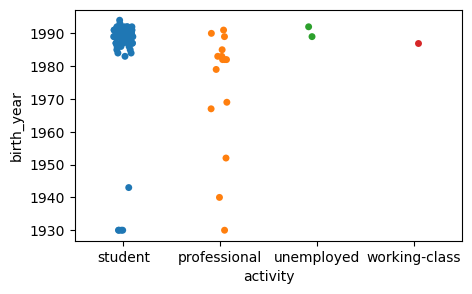

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.stripplot(x=userprofile['activity'], y=userprofile['birth_year'], size=5);

Create a new column called age,the age will be calculated as of the year 2010.

In [ ]:
userprofile['age']=2010-userprofile['birth_year']
userprofile = userprofile.drop(columns='birth_year',axis=1)
dataset_dic['userprofile']=userprofile

<AxesSubplot:>

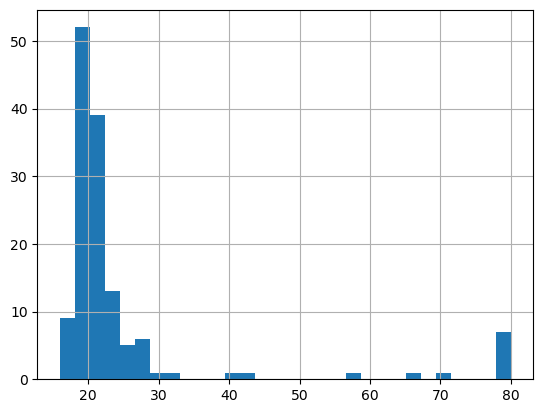

In [ ]:
userprofile['age'].hist(bins=30)

END of the dataset Introducation

# Exploration

[Back to content of table](#Content-of-Table)

As we discovered in the rating_final dataset, it contains 130 restaurants and 138 customers. "PlaceID" serves as our key variable to join the datasets for the following analysis. Recall our main question is: what determines customers' satisfaction with restaurants? For simplicity and clearity, we mainly focus on the overall rating in the exploration stage.

The exploration contains 2 main aspects:

1. Basic exploration:

- We will explore how the customer-related dataset features are distributed with respect to the ratings to gain a basic sense of customer rating preferences (i.e., some customers are always strict, while others have a more lenient rating style).  
- We will explore how the restaurant-related dataset features are distributed with respect to the ratings to gain a basic understanding of the restaurant's performance (i.e., whether the restaurant is generally rated as good or bad).

2. Advanced exploration:
- We will investigate how the customer-related dataset features and restaurant-related dataset features interact with each other, leading to different rating distributions using machine learning.

## Basic Exploration

### Customer-related features

We will explore how the customer-related features first.Customer-related datasets include userprofile,userpayment,usercuisine and rating.

In [ ]:
# conda install graphviz
# conda install ipython

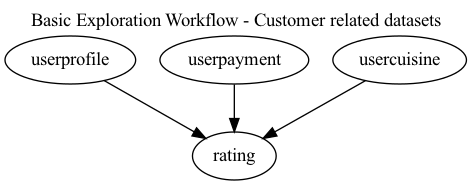

In [ ]:
from graphviz import Digraph
from IPython.display import Image,display

workflow_graph = Digraph('BasicExplorationCustomer',filename='BasicExplorationCustomer.gv',format='png')

workflow_graph.attr(label="Basic Exploration Workflow - Customer related datasets")
workflow_graph.attr(labelloc='t')

workflow_graph.node("userprofile")
workflow_graph.node("userpayment")
workflow_graph.node("usercuisine")
workflow_graph.node("rating")

workflow_graph.edges([
('userprofile','rating'),
('userpayment','rating'),
('usercuisine','rating'),
])

workflow_graph.render('BasicExplorationCustomer',view=False)
display(Image("BasicExplorationCustomer.png"))

Merge the three datasets: userprofile and rating. We didn't merged all these datasets together because  some customer have multiple cuisine types and payment methods , which if merged would result in duplicate userID entries and skew the distribution of rating.But we handle the datasets seperatly

In [ ]:
merged_userprofile_rating= pd.merge(userprofile,rating_final,on='userID',how='left')
merged_usercuisine_rating=pd.merge(usercuisine,rating_final,on='userID',how='left')
merged_userpamtmeny_rating=pd.merge(userpayment,rating_final,on='userID',how='left')

Check the average rating preferences of each customer. There are some customers who always give full ratings, while others consistently give low ratings.

In [ ]:
groupbyUserID= merged_userprofile_rating.groupby('userID')['rating'].mean().reset_index()

groupbyUserID_count=merged_userprofile_rating['userID'].value_counts().reset_index()
groupbyUserID_count.columns=['userID','count']

groupbyUserID_rating_count = pd.merge(groupbyUserID,groupbyUserID_count,on='userID').sort_values(by='rating',ascending=False)

#Print top 10 and tail 10 ratings
pd.concat([groupbyUserID_rating_count.head(10),groupbyUserID_rating_count.tail(10)])

,userID,rating,count
106,U1107,2.000000,3
101,U1102,2.000000,5
73,U1074,2.000000,3
99,U1100,2.000000,6
20,U1021,2.000000,3
126,U1127,2.000000,4
15,U1016,1.923077,13
121,U1122,1.916667,12
53,U1054,1.909091,11
54,U1055,1.900000,10


Check the average rating across different user-preferred cuisines. There are some customers who own a certain type of cuisine consistently give low ratings.There are 54 of these cuisines, and for each of  them , the total number of ratings given by customers who own these cuisines is 14. However, we have discovered that each of the 14 ratings were all given by one customer.(showed in the #Users have this preferred)

In [ ]:
groupbyDF_Rcuisine_avg=merged_usercuisine_rating.groupby('Rcuisine')['rating'].mean().reset_index()
groupbyDF_Rcuisine_avg=groupbyDF_Rcuisine_avg.sort_values(by='Rcuisine')

groupbyDF_Rcuisine_count=merged_usercuisine_rating['Rcuisine'].value_counts().reset_index()
groupbyDF_Rcuisine_count.columns=['Rcuisine','count']
groupbyDF_Rcuisine_count=groupbyDF_Rcuisine_count.sort_values(by='Rcuisine')

groupbyDF_Rcuisine_avg_count=pd.merge(groupbyDF_Rcuisine_avg,groupbyDF_Rcuisine_count,on='Rcuisine',how='left').sort_values(by='rating')
groupbyDF_Rcuisine_avg_count

usercuisine_Rcuisine_count=usercuisine['Rcuisine'].value_counts().reset_index()
usercuisine_Rcuisine_count.columns=['Rcuisine','#Users have this preferred']

cuisine_zero_rating_number=groupbyDF_Rcuisine_avg_count[groupbyDF_Rcuisine_avg_count['rating']==0].shape[0]
print('There are {} number of cuisine_zero_rating '.format(cuisine_zero_rating_number))

temp_merge=pd.merge(groupbyDF_Rcuisine_avg_count[groupbyDF_Rcuisine_avg_count['rating']==0],usercuisine_Rcuisine_count,on='Rcuisine',how='inner')
temp_merge.head()

There are 54 number of cuisine_zero_rating 


,Rcuisine,rating,count,#Users have this preferred
0,Vietnamese,0.0,14,1
1,Eclectic,0.0,14,1
2,Ethiopian,0.0,14,1
3,Russian-Ukrainian,0.0,14,1
4,Filipino,0.0,14,1


Is the low rating related to the customers themselves or the type of cuisine they prefer? Let's investigate if these customers exclusively prefer these specific types of cuisine.

We have noticed that customer U1135 has 103 preferred cuisines. Interestingly, the cuisines that have been given a rating of 0 are all present in this customer's preferred list, amounting to 54 types. This suggests that all the 0 ratings are actually provided by a single customer, U1135. Therefore, these ratings are not influenced by cuisine type, but rather by the customer's individual preferences.

To provide further clarification: Initially, we assumed that each customer who gave a 0 rating to a specific cuisine type represented a separate customer for each type, resulting in an expectation of 54 such customers. However, upon closer investigation, we discovered that all these cuisine types were actually owned by a single customer.

In [ ]:
# find the unique user who own those cuisine.
uniqueUserWith_those_cuisine = []
for userID in usercuisine['userID'].unique():
    if np.isin(usercuisine[usercuisine['userID'] == userID]['Rcuisine'].unique(), temp_merge['Rcuisine'].unique()).any():
        uniqueUserWith_those_cuisine.append(userID)
print(uniqueUserWith_those_cuisine)
print("The customer have {} preference".format(usercuisine[usercuisine['userID'] == 'U1135']['Rcuisine'].nunique()))
i=0
# Check if the his/her preferred types includes the above 54 cuisine.
for cuisine in usercuisine[usercuisine['userID'] == 'U1135']['Rcuisine'].unique():
    if cuisine in temp_merge['Rcuisine'].unique():
        i=i+1
print(i)

['U1135']
The customer have 103 preference
54


In [ ]:
rating_final[rating_final['userID']=='U1135']

,userID,placeID,rating,food_rating,service_rating
695,U1135,135085,0,0,0
696,U1135,135106,0,0,0
697,U1135,135052,0,0,0
698,U1135,135041,0,0,0
705,U1135,132825,0,0,0
706,U1135,132834,0,0,0
710,U1135,135058,0,0,0
712,U1135,135063,0,0,0
713,U1135,132856,0,0,0
714,U1135,135045,0,0,0


Check the average rating for each user payment method. Since 'userpayment' is not an important feature, we won't invest significant effort in analyzing it.

In [ ]:
groupbyDF_Rcuisine_avg=merged_userpamtmeny_rating.groupby('Upayment')['rating'].mean().reset_index()
groupbyDF_Rcuisine_avg=groupbyDF_Rcuisine_avg.sort_values(by='Upayment')

groupbyDF_Rcuisine_count=merged_userpamtmeny_rating['Upayment'].value_counts().reset_index()
groupbyDF_Rcuisine_count.columns=['Upayment','count']
groupbyDF_Rcuisine_count=groupbyDF_Rcuisine_count.sort_values(by='Upayment')

groupbyDF_Rcuisine_avg_count=pd.merge(groupbyDF_Rcuisine_avg,groupbyDF_Rcuisine_count,on='Upayment',how='left').sort_values(by='rating')
groupbyDF_Rcuisine_avg_count

,Upayment,rating,count
1,MasterCard-Eurocard,1.088235,34
4,cash,1.182815,1094
2,VISA,1.230769,130
3,bank_debit_cards,1.437908,153
0,American_Express,1.470588,17


End of features userID ,cuisine type and payment methods.

Show the rating distribution for remaing customer-related features

In [ ]:
merged_userprofile_rating.shape

(1161, 23)

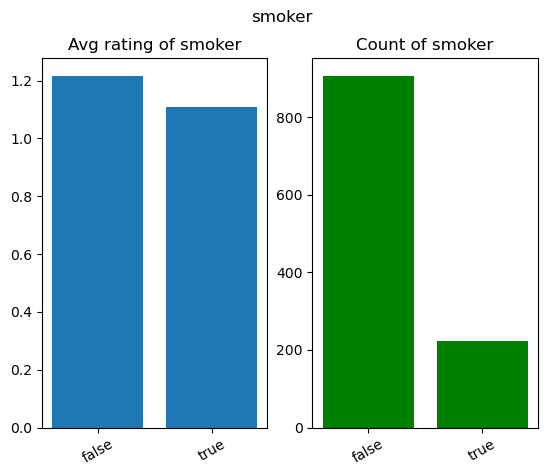

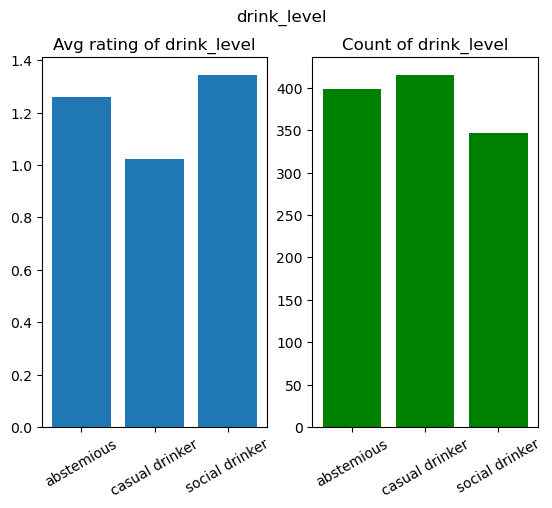

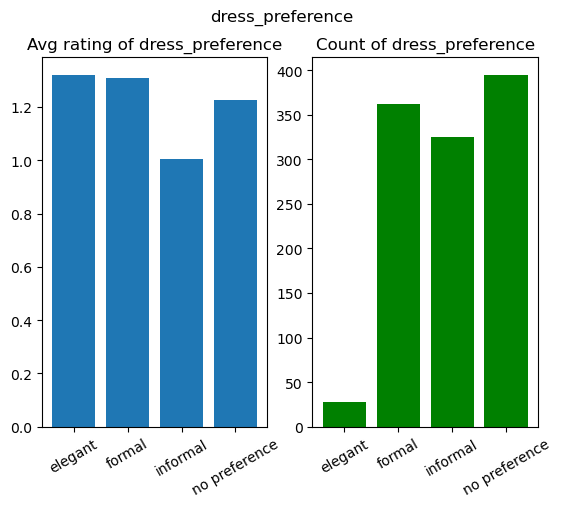

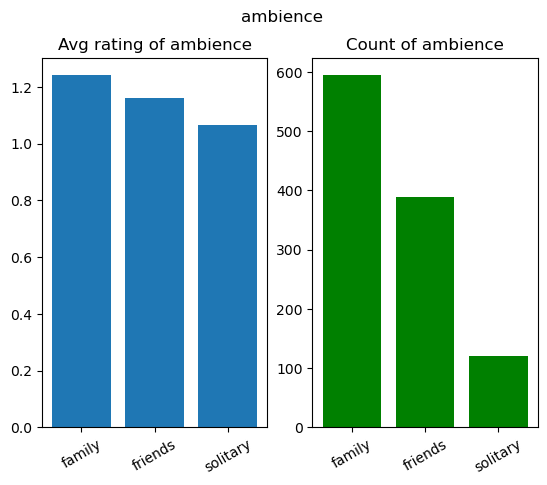

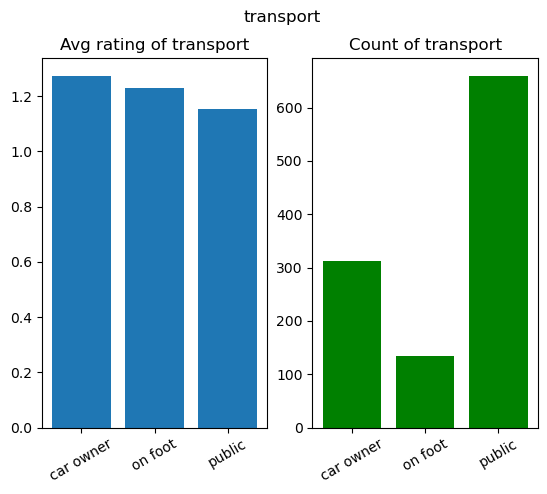

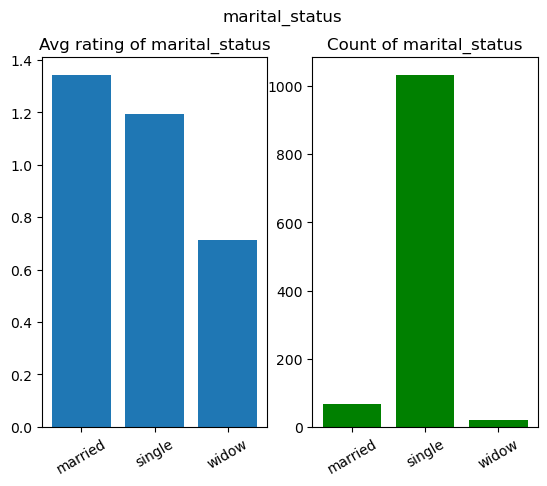

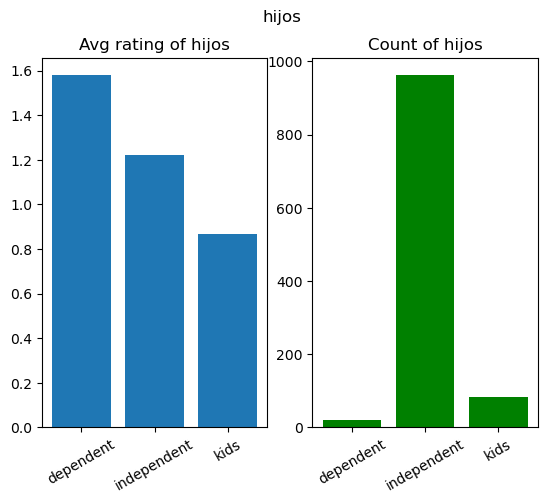

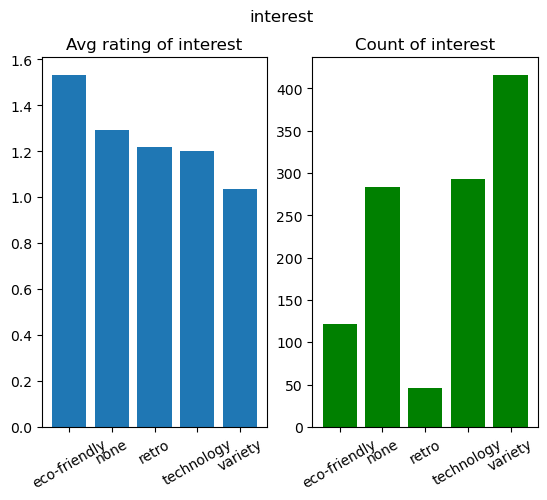

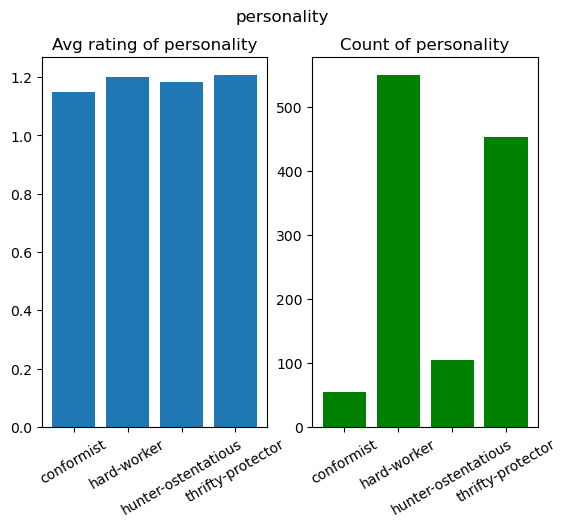

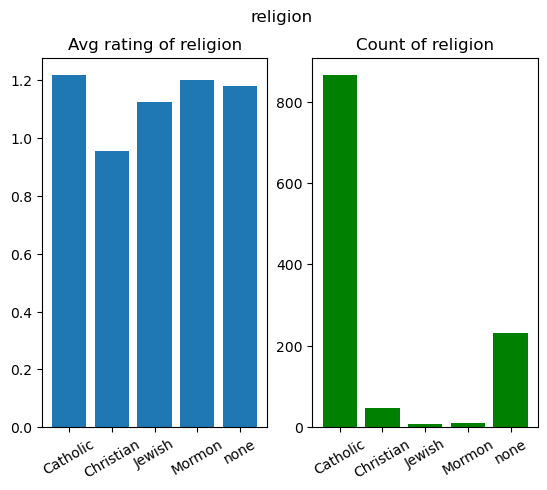

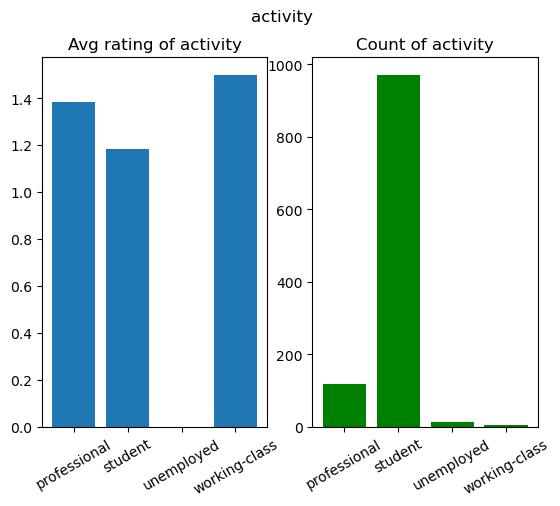

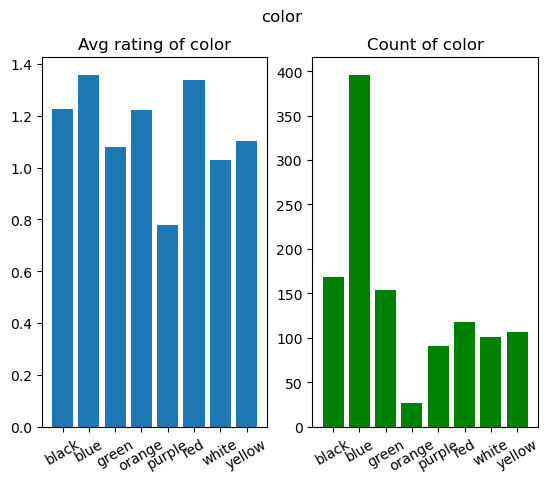

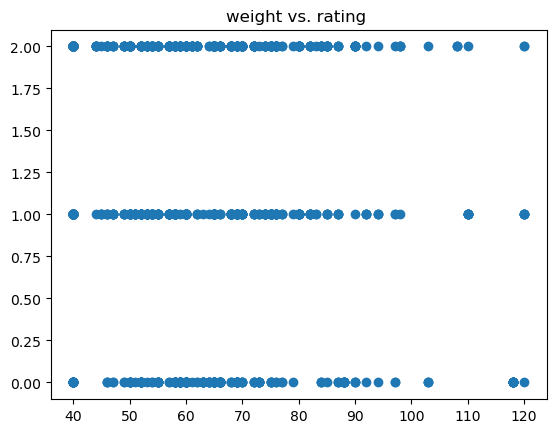

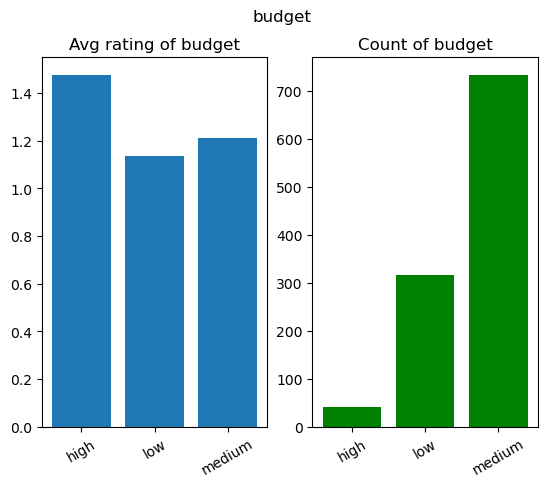

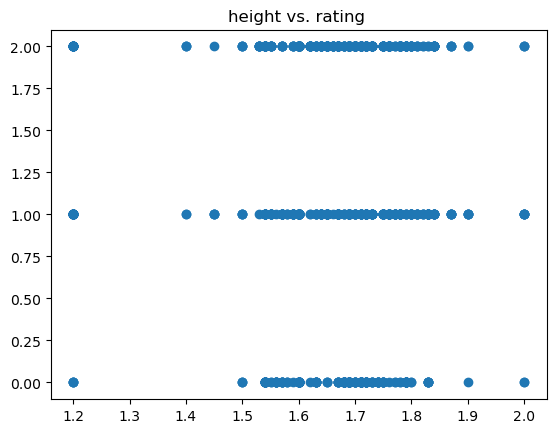

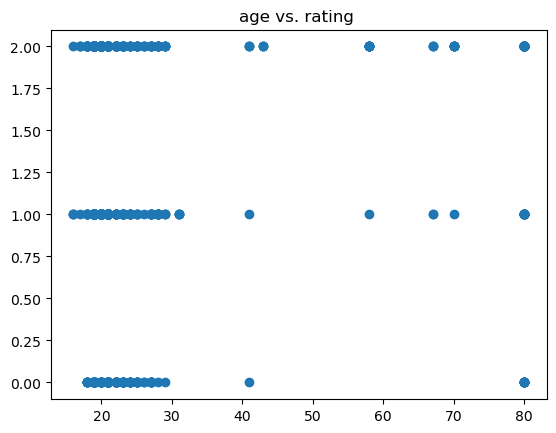

In [ ]:
for column in merged_userprofile_rating.columns:
    if column!='userID' and column!='placeID' and column!='rating' and column!='food_rating'and column!='service_rating':

        # for numeric variable plot a scatter plot
        if merged_userprofile_rating[column].dtypes=='int64' or merged_userprofile_rating[column].dtypes=='float64':
            if column!='latitude' and column!='longitude':
                plt.scatter(merged_userprofile_rating[column],merged_userprofile_rating['rating'])
                plt.title("{} vs. rating ".format(column))
                plt.show()


        # for categorical variable: plot a bar plot and a count plot
        if merged_userprofile_rating[column].dtypes=='object':

            fig,axs = plt.subplots(1,2)

            groupbyDF_avg=merged_userprofile_rating.groupby(column)['rating'].mean().reset_index()
            groupbyDF_avg=groupbyDF_avg.sort_values(by=column)

            groupbyDF_count=merged_userprofile_rating[column].value_counts().reset_index()
            groupbyDF_count.columns=[column,'count']
            groupbyDF_count=groupbyDF_count.sort_values(by=column)

            angle=30
            if column=='Upayment':
                angle=60

            axs[0].bar(groupbyDF_avg[column],groupbyDF_avg['rating'])
            axs[0].set_title('Avg rating of {}'.format(column))
            axs[0].tick_params(axis='x',rotation=angle)


            axs[1].bar(groupbyDF_count[column],groupbyDF_count['count'],color='green')
            axs[1].set_title('Count of {}'.format(column))
            axs[1].tick_params(axis='x',rotation=angle)

            plt.suptitle('{}'.format(column))
            plt.show()



Check if the rating difference shown in the above plots between groups is statistical significant.   
It shows that 'smoker',drink_level',
 'dress_preference',
 'transport',
 'marital_status',
 'hijos',
 'interest',
 'activity',
 'color',
 'budget',
 'Upayment' these features show significant difference acorss groups.

In [ ]:
# pip install scipy numpy
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# calculate the p-value of difference of groups
def group_Ratingdifference_Pvalue(column,dataset):
    levels=dataset[column].dropna().unique()
    levels=levels.tolist()

    category_dict={}
    i=1
    p_value=None
    for level in levels:
        category_dict['group_{}'.format(i)]=dataset[dataset[column]==level]['rating']
        i=i+1

    if len(category_dict)==2:
        statistic, p_value = ttest_ind(category_dict['group_1'], category_dict['group_2'], equal_var=False)

    if len(category_dict)>2:
        groups_data=list(category_dict.values())
        statistic, p_value = f_oneway(*groups_data)

    return p_value

In [ ]:
significant_different_groups_cus=[]
for column in merged_userprofile_rating.columns:
    if column!='userID' and column!='placeID' and column!='rating' and column!='food_rating'and column!='service_rating':
        if merged_userprofile_rating[column].dtypes=='object':
            p_value=group_Ratingdifference_Pvalue(column,merged_userprofile_rating)
            if p_value < 0.05:
                significant_different_groups_cus.append(column)

significant_different_groups_cus

['smoker',
 'drink_level',
 'dress_preference',
 'ambience',
 'marital_status',
 'hijos',
 'interest',
 'activity',
 'color',
 'budget']

End of the customer-related features exploration

### Restaurant-related features

We then explore how the Restaurant-related features .Restaurant-related datasets include  AcceptPayment,CuisineType,geoplaces,Parking,Openhour.

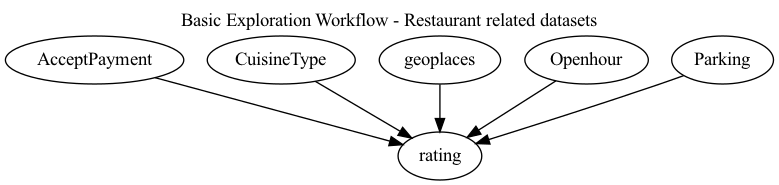

In [ ]:
from graphviz import Digraph
from IPython.display import Image,display

workflow_graph = Digraph('BasicExplorationRestaurant',filename='BasicExplorationRestaurant.gv',format='png')

workflow_graph.attr(label="Basic Exploration Workflow - Restaurant related datasets")
workflow_graph.attr(labelloc='t')



workflow_graph.node("AcceptPayment")
workflow_graph.node("CuisineType")
workflow_graph.node("geoplaces")
workflow_graph.node("Openhour")
workflow_graph.node("Parking")
workflow_graph.node("rating")


workflow_graph.edges([
('AcceptPayment','rating'),
('CuisineType','rating'),
('geoplaces','rating'),
('Openhour','rating'),
('Parking','rating'),
])



workflow_graph.render('BasicExplorationRestaurant',view=False)
display(Image("BasicExplorationRestaurant.png"))

Recalling from the dataset introduction section, we observe that each restaurant can have multiple accepted payment methods, cuisine types, and opening hours. Only the geoplace and parking dataset provides exact one-to-one information about the restaurants. Therefore, we cannot simply merge those datasets with the geoplaces dataset to avoid duplicating restaurant IDs and skewing the distribution of ratings.

In [ ]:
merged_geo_parking=pd.merge(geoplaces,Parking,on='placeID',how='left')
merged_geo_parking_rating=pd.merge(merged_geo_parking,rating_final,on='placeID',how='left')

merged_accPayment_rating=pd.merge(AcceptPayment,rating_final,on='placeID',how='left')

merged_cuisine_rating=pd.merge(CuisineType,rating_final,on='placeID',how='left')

merged_openhour_rating=pd.merge(Openhour,rating_final,on='placeID',how='left')

let explore each feature rating distirbution one by one

In [ ]:
#features accept payment method
groupbyDF_Rcuisine_avg=merged_accPayment_rating.groupby('Rpayment')['rating'].mean().reset_index()
groupbyDF_Rcuisine_avg=groupbyDF_Rcuisine_avg.sort_values(by='Rpayment')

groupbyDF_Rcuisine_count=merged_accPayment_rating['Rpayment'].value_counts().reset_index()
groupbyDF_Rcuisine_count.columns=['Rpayment','count']
groupbyDF_Rcuisine_count=groupbyDF_Rcuisine_count.sort_values(by='Rpayment')

groupbyDF_Rcuisine_avg_count=pd.merge(groupbyDF_Rcuisine_avg,groupbyDF_Rcuisine_count,on='Rpayment',how='left').sort_values(by='rating')
groupbyDF_Rcuisine_avg_count

,Rpayment,rating,count
6,cash,1.203406,1057
3,MasterCard-Eurocard,1.247664,428
4,VISA,1.253796,461
0,American_Express,1.331915,235
5,bank_debit_cards,1.346154,104
2,Discover,1.666667,3
7,checks,1.750000,4
1,Carte_Blanche,2.000000,5


The lowest average rating was obtained by the "Regional" category, while the "Mediterranean" category achieved the highest average rating,but the rating could be baised, because the number of rating it received.The prevalent cuisine type in our dataset, which is "Mexican," attained an average rating of 1.189.

In [ ]:
#feature restaurant cuisine type
groupbyDF_Rcuisine_avg=merged_cuisine_rating.groupby('Rcuisine')['rating'].mean().reset_index()
groupbyDF_Rcuisine_avg=groupbyDF_Rcuisine_avg.sort_values(by='Rcuisine')

groupbyDF_Rcuisine_count=merged_cuisine_rating['Rcuisine'].value_counts().reset_index()
groupbyDF_Rcuisine_count.columns=['Rcuisine','count']
groupbyDF_Rcuisine_count=groupbyDF_Rcuisine_count.sort_values(by='Rcuisine')

groupbyDF_Rcuisine_avg_count=pd.merge(groupbyDF_Rcuisine_avg,groupbyDF_Rcuisine_count,on='Rcuisine',how='left').sort_values(by='rating')
groupbyDF_Rcuisine_avg_count

,Rcuisine,rating,count
20,Regional,0.500000,4
5,Breakfast-Brunch,1.000000,9
6,Burgers,1.032258,31
15,Italian,1.038462,26
19,Pizzeria,1.117647,51
0,American,1.153846,39
12,Fast_Food,1.164835,91
22,Vietnamese,1.166667,6
18,Mexican,1.189076,238
3,Bar,1.200000,140


Let's see the avg rating of each resturants.

In [ ]:
groupbyPlaceID_avg= rating_final.groupby('placeID')['rating'].mean().reset_index()

groupbyPlaceID_count=rating_final['placeID'].value_counts().reset_index()
groupbyPlaceID_count.columns=['placeID','count']

groupbyPlaceID_rating_count = pd.merge(groupbyPlaceID_avg,groupbyPlaceID_count,on='placeID').sort_values(by='rating',ascending=False)

#Print top 10 and tail 10 ratings
pd.concat([groupbyPlaceID_rating_count.head(10),groupbyPlaceID_rating_count.tail(10)])

,placeID,rating,count
57,132955,2.000000,5
82,135034,2.000000,5
62,134986,2.000000,8
52,132922,1.833333,6
26,132755,1.800000,5
70,135013,1.750000,4
60,134976,1.750000,4
116,135074,1.750000,4
101,135055,1.714286,7
117,135075,1.692308,13



Among the restaurants, only three (about 2%) received full ratings. After studying these establishments, we didn't find any significant shared characteristics, likely due to the small sample size.

In [ ]:
merged_geo_parking_rating[merged_geo_parking_rating['placeID']==132955].head(1)

,placeID,latitude,longitude,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,parking_lot,userID,rating,food_rating,service_rating
416,132955,22.147622,-101.010275,San Luis Potosi,Mexico,Wine-Beer,none,informal,completely,low,familiar,t,closed,variety,none,U1004,2,2,2


In [ ]:
merged_geo_parking_rating[merged_geo_parking_rating['placeID']==135034].head(1)

,placeID,latitude,longitude,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,parking_lot,userID,rating,food_rating,service_rating
467,135034,22.140517,-101.021422,San Luis Potosi,San Luis Potosi,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,none,U1083,2,2,2


In [ ]:
merged_geo_parking_rating[merged_geo_parking_rating['placeID']==134986].head(1)

,placeID,latitude,longitude,city,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,parking_lot,userID,rating,food_rating,service_rating
966,134986,18.928798,-99.239513,Cuernavaca,Morelos,Wine-Beer,none,formal,no_accessibility,high,familiar,f,closed,none,yes,U1030,2,2,2


Check the remaining features in the dataset geoplaces.

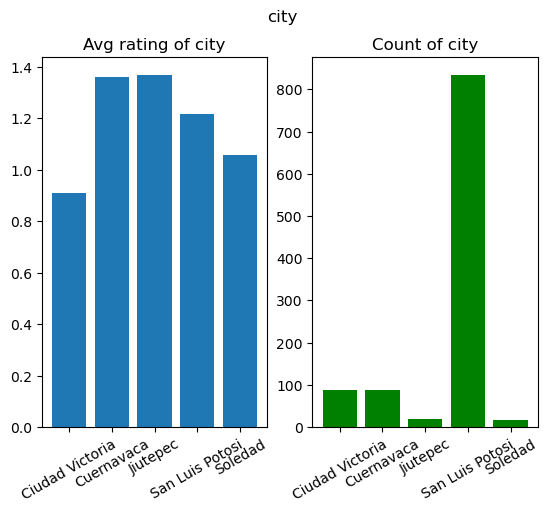

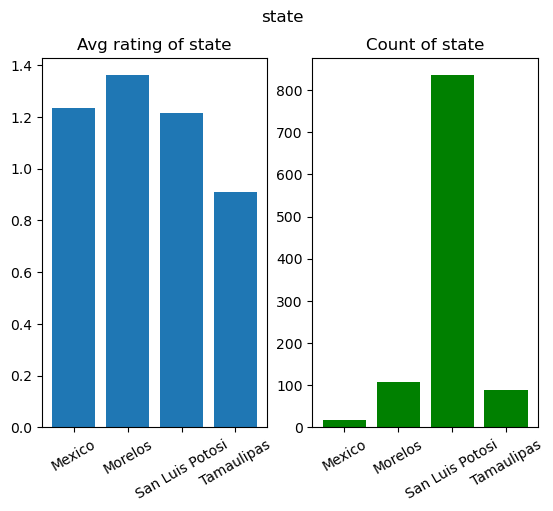

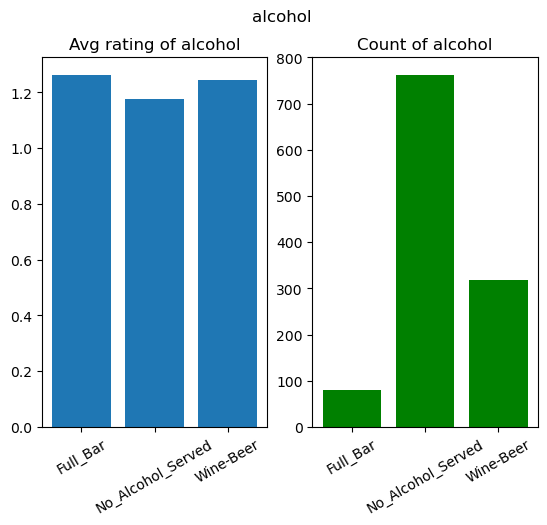

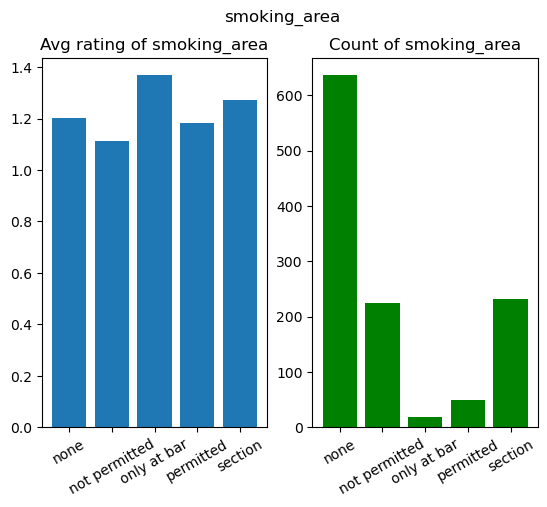

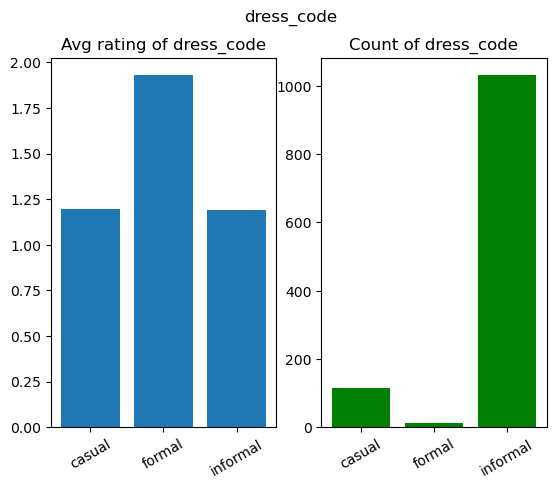

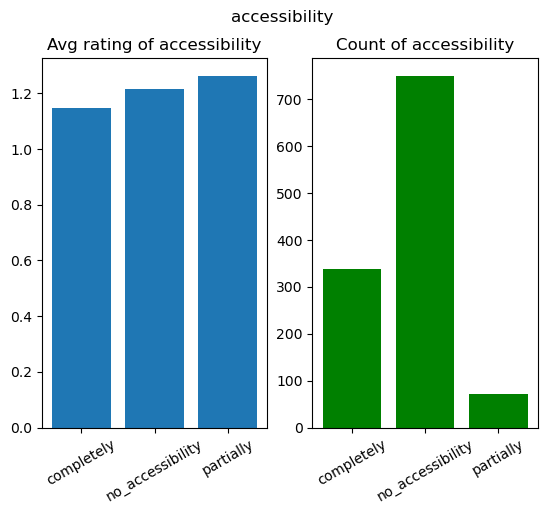

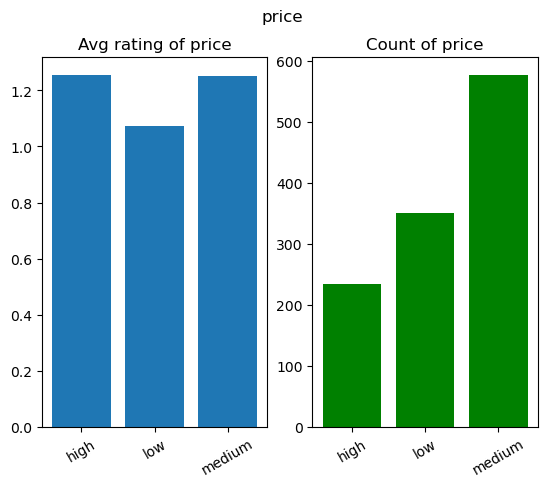

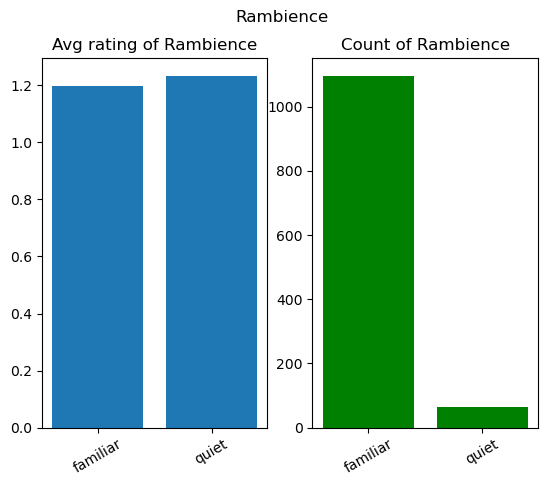

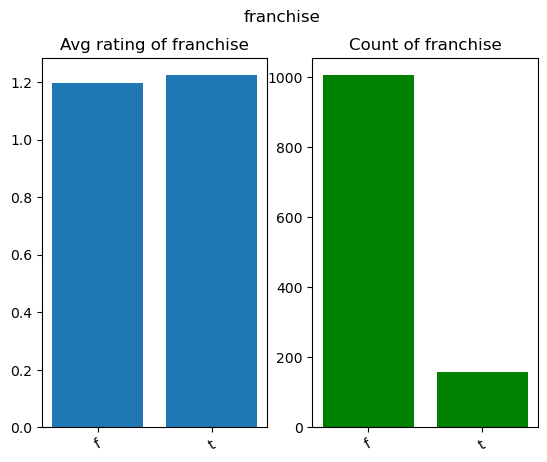

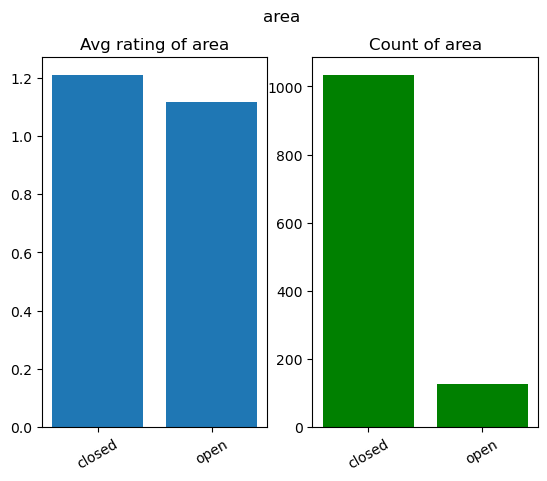

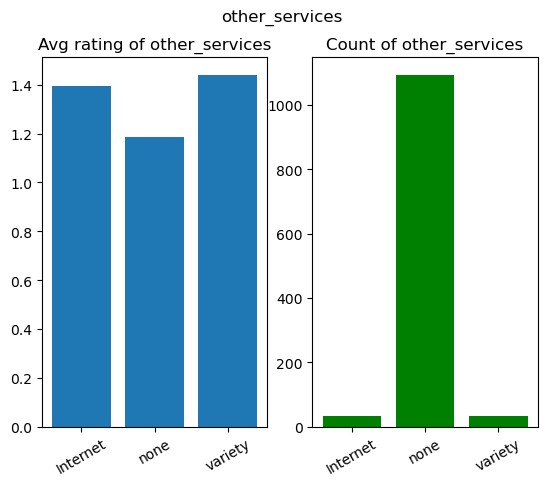

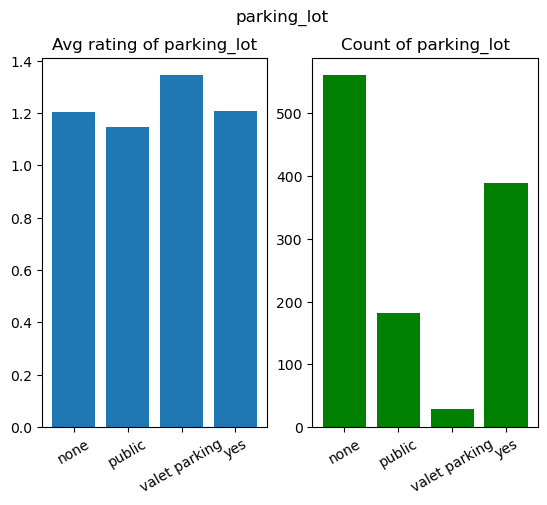

In [ ]:
for column in merged_geo_parking_rating.columns:
    if column!='userID' and column!='placeID' and column!='rating' and column!='food_rating'and column!='service_rating':

        # for numeric variable plot a scatter plot
        if merged_geo_parking_rating[column].dtypes=='int64' or merged_geo_parking_rating[column].dtypes=='float64':
            if column!='latitude' and column!='longitude':
                plt.scatter(merged_geo_parking_rating[column],merged_geo_parking_rating['rating'])
                plt.title("{} vs. rating ".format(column))
                plt.show()


        # for categorical variable: plot a bar plot and a count plot
        if merged_geo_parking_rating[column].dtypes=='object':

            fig,axs = plt.subplots(1,2)

            groupbyDF_avg=merged_geo_parking_rating.groupby(column)['rating'].mean().reset_index()
            groupbyDF_avg=groupbyDF_avg.sort_values(by=column)

            groupbyDF_count=merged_geo_parking_rating[column].value_counts().reset_index()
            groupbyDF_count.columns=[column,'count']
            groupbyDF_count=groupbyDF_count.sort_values(by=column)

            angle=30
            if column=='Upayment':
                angle=60

            axs[0].bar(groupbyDF_avg[column],groupbyDF_avg['rating'])
            axs[0].set_title('Avg rating of {}'.format(column))
            axs[0].tick_params(axis='x',rotation=angle)


            axs[1].bar(groupbyDF_count[column],groupbyDF_count['count'],color='green')
            axs[1].set_title('Count of {}'.format(column))
            axs[1].tick_params(axis='x',rotation=angle)

            plt.suptitle('{}'.format(column))
            plt.show()



We found that the average rating between groups in features 'city', 'state', 'dress_code', 'price'are significantly different

In [ ]:
significant_different_groups_res=[]
for column in merged_geo_parking_rating.columns:
    if column!='userID' and column!='placeID' and column!='rating' and column!='food_rating'and column!='service_rating':
        if merged_geo_parking_rating[column].dtypes=='object':
            p_value_=group_Ratingdifference_Pvalue(column,merged_geo_parking_rating)
            if p_value_ < 0.05:
                significant_different_groups_res.append(column)

significant_different_groups_res

['city', 'state', 'dress_code', 'price']

End of the basic exploration.

## Advanced Exploration - Machine Learning

We will investigate how the customer-related dataset features and restaurant-related dataset features interact with each other. We will use machine learning feature importance to select the features that help predict the resturants rating.

In [ ]:
merged_geo_parking_rating_userprofile=pd.merge(merged_geo_parking_rating,userprofile,on='userID',how='left')
merged_geo_parking_rating_userprofile=merged_geo_parking_rating_userprofile.drop(columns=['food_rating','service_rating','color'],axis=1)

check the distance between restaurant and users

In [ ]:
import math
def distance_place_user(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

In [ ]:
merged_geo_parking_rating_userprofile['distance'] = distance_place_user(
    merged_geo_parking_rating_userprofile['latitude_x'],
    merged_geo_parking_rating_userprofile['longitude_x'],
    merged_geo_parking_rating_userprofile['latitude_y'],
    merged_geo_parking_rating_userprofile['longitude_y']
)
merged_geo_parking_rating_userprofile=merged_geo_parking_rating_userprofile.drop(columns=['latitude_x','longitude_x','latitude_y','longitude_y'])

Most of the distance  between restaurant and users are 0 to 5 kilomethers.Most of the the customer are local people.The rating didn't show any relationship with distance.

In [ ]:
merged_geo_parking_rating_userprofile['distance'].describe()

count    1161.000000
mean       22.471537
std        81.836541
min         0.000000
25%         0.932018
50%         2.272634
75%         4.728010
max       411.620805
Name: distance, dtype: float64

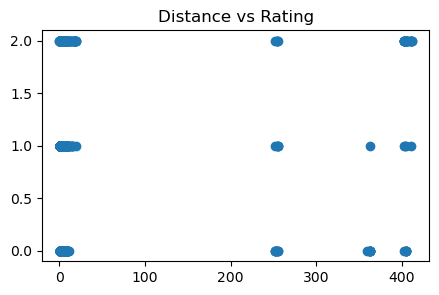

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(merged_geo_parking_rating_userprofile['distance'],merged_geo_parking_rating_userprofile['rating'])
plt.title('Distance vs Rating');

We will create serveral new variables to label if  the customer preferece match with the restaurants provide. If they match, the value is 1, otherwise the new column values will be 0.

We created four variables match_alcohol,match_smoking,match_dress_code and match_parkinglot and match_price

In [ ]:
# create the variable match_alcohol to check if customer drink alcohol and resturnats provide
merged_geo_parking_rating_userprofile['new_alcohol'] = merged_geo_parking_rating_userprofile['alcohol']
mask = merged_geo_parking_rating_userprofile['new_alcohol'] == 'No_Alcohol_Served'
merged_geo_parking_rating_userprofile.loc[mask, 'new_alcohol'] = 0
merged_geo_parking_rating_userprofile.loc[~mask, 'new_alcohol'] = 1

merged_geo_parking_rating_userprofile['new_drink_level'] = merged_geo_parking_rating_userprofile['drink_level']
mask = merged_geo_parking_rating_userprofile['new_drink_level'] == 'abstemious'
merged_geo_parking_rating_userprofile.loc[mask, 'new_drink_level'] = 0
merged_geo_parking_rating_userprofile.loc[~mask, 'new_drink_level'] = 1

merged_geo_parking_rating_userprofile['match_alcohol'] = (
    merged_geo_parking_rating_userprofile['new_alcohol'] == merged_geo_parking_rating_userprofile['new_drink_level']
).astype(int)

merged_geo_parking_rating_userprofile=merged_geo_parking_rating_userprofile.drop(columns=['new_alcohol','new_drink_level'])


# Create the variable match_smoking
merged_geo_parking_rating_userprofile['new_smoking_area'] = merged_geo_parking_rating_userprofile['smoking_area']
mask = (merged_geo_parking_rating_userprofile['new_smoking_area'] == 'none') | (merged_geo_parking_rating_userprofile['new_smoking_area'] == 'not permitted')
merged_geo_parking_rating_userprofile.loc[mask, 'new_smoking_area'] = 0
merged_geo_parking_rating_userprofile.loc[~mask, 'new_smoking_area'] = 1

merged_geo_parking_rating_userprofile['new_smoker'] = merged_geo_parking_rating_userprofile['smoker']
mask = merged_geo_parking_rating_userprofile['new_smoker'] == 'false'
merged_geo_parking_rating_userprofile.loc[mask, 'new_smoker'] = 0
merged_geo_parking_rating_userprofile.loc[~mask, 'new_smoker'] = 1

merged_geo_parking_rating_userprofile['match_smoking'] = (
    merged_geo_parking_rating_userprofile['new_smoking_area'] == merged_geo_parking_rating_userprofile['new_smoker']
).astype(int)

merged_geo_parking_rating_userprofile = merged_geo_parking_rating_userprofile.drop(columns=['new_smoking_area', 'new_smoker'])


# Create the variable match_dress_code
merged_geo_parking_rating_userprofile['new_dress_code'] = merged_geo_parking_rating_userprofile['dress_code']
mask = merged_geo_parking_rating_userprofile['new_dress_code'] == 'formal'
merged_geo_parking_rating_userprofile.loc[mask, 'new_dress_code'] = 0
merged_geo_parking_rating_userprofile.loc[~mask, 'new_dress_code'] = 1

merged_geo_parking_rating_userprofile['new_dress_preference'] = merged_geo_parking_rating_userprofile['dress_preference']
mask = (merged_geo_parking_rating_userprofile['new_dress_preference'] == 'formal')|(merged_geo_parking_rating_userprofile['new_dress_preference'] == 'elegant')
merged_geo_parking_rating_userprofile.loc[mask, 'new_dress_preference'] = 0
merged_geo_parking_rating_userprofile.loc[~mask, 'new_dress_preference'] = 1

merged_geo_parking_rating_userprofile['match_dress_code'] = (
    merged_geo_parking_rating_userprofile['new_dress_code'] == merged_geo_parking_rating_userprofile['new_dress_preference']
).astype(int)

merged_geo_parking_rating_userprofile = merged_geo_parking_rating_userprofile.drop(columns=['new_dress_code', 'new_dress_preference'])



# Create the variable match_parkinglot
merged_geo_parking_rating_userprofile['new_parking_lot'] = merged_geo_parking_rating_userprofile['parking_lot']
mask = merged_geo_parking_rating_userprofile['new_parking_lot'] == 'none'
merged_geo_parking_rating_userprofile.loc[mask, 'new_parking_lot'] = 0
merged_geo_parking_rating_userprofile.loc[~mask, 'new_parking_lot'] = 1

merged_geo_parking_rating_userprofile['new_transport'] = merged_geo_parking_rating_userprofile['dress_preference']
mask = merged_geo_parking_rating_userprofile['new_transport'] == 'car owner'
merged_geo_parking_rating_userprofile.loc[mask, 'new_transport'] = 1
merged_geo_parking_rating_userprofile.loc[~mask, 'new_transport'] = 0


merged_geo_parking_rating_userprofile['match_parking_lot'] = (
    merged_geo_parking_rating_userprofile['new_parking_lot'] == merged_geo_parking_rating_userprofile['new_transport']
).astype(int)

merged_geo_parking_rating_userprofile = merged_geo_parking_rating_userprofile.drop(columns=['new_parking_lot', 'new_transport'])


# Create the variable match_price

merged_geo_parking_rating_userprofile['new_price'] = merged_geo_parking_rating_userprofile['price']
mask_1 = merged_geo_parking_rating_userprofile['new_price'] == 'high'
mask_2 = merged_geo_parking_rating_userprofile['new_price'] == 'medium'
mask_3 = merged_geo_parking_rating_userprofile['new_price'] == 'low'
merged_geo_parking_rating_userprofile.loc[mask_1, 'new_price'] = 1
merged_geo_parking_rating_userprofile.loc[mask_2, 'new_price'] = 2
merged_geo_parking_rating_userprofile.loc[mask_3, 'new_price'] = 3


merged_geo_parking_rating_userprofile['new_budget'] = merged_geo_parking_rating_userprofile['budget']
mask_1 = merged_geo_parking_rating_userprofile['new_budget'] == 'high'
mask_2 = merged_geo_parking_rating_userprofile['new_budget'] == 'medium'
mask_3 = merged_geo_parking_rating_userprofile['new_budget'] == 'low'
merged_geo_parking_rating_userprofile.loc[mask_1, 'new_price'] = 1
merged_geo_parking_rating_userprofile.loc[mask_2, 'new_price'] = 2
merged_geo_parking_rating_userprofile.loc[mask_3, 'new_price'] = 3

merged_geo_parking_rating_userprofile['match_price'] = (
    merged_geo_parking_rating_userprofile['new_price'] == merged_geo_parking_rating_userprofile['new_budget']
).astype(int)

merged_geo_parking_rating_userprofile = merged_geo_parking_rating_userprofile.drop(columns=['new_price', 'new_budget'])




In [ ]:
data=merged_geo_parking_rating_userprofile
original_dtypes = data.dtypes

In [ ]:
data.shape

(1161, 36)

In [ ]:
data['distance']=data['distance'].astype('float64')
data['match_alcohol']=data['match_alcohol'].astype('object')
data['match_smoking']=data['match_smoking'].astype('object')
data['match_dress_code']=data['match_dress_code'].astype('object')
data['match_parking_lot']=data['match_parking_lot'].astype('object')
data['match_price']=data['match_price'].astype('object')
data=data.replace({pd.NA:np.nan})

In [ ]:
# Fill the missing value for categorical varibales
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data = data.astype(original_dtypes)

In [ ]:
# labelencoder for categorical variable
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

encoder=LabelEncoder()
categorical_var_list=data.select_dtypes(include=['object']).columns
encoded_features = data[categorical_var_list].apply(encoder.fit_transform)
encoded_df = pd.concat([data.select_dtypes(exclude='object'), encoded_features], axis=1)


In [ ]:
X=encoded_df.drop('rating',axis=1)
y=encoded_df['rating']

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model=RandomForestRegressor(random_state=88)

In [ ]:
%%time
sfs = SequentialFeatureSelector(model, n_features_to_select=8, direction='forward')
sfs.fit(X_scaled, y)
selected_feature_indices = sfs.get_support(indices=True)

CPU times: user 1min 45s, sys: 612 ms, total: 1min 46s
Wall time: 1min 46s


In [ ]:
selected_feature_names = [encoded_df.columns[i] for i in selected_feature_indices]
selected_feature_names

['match_parking_lot',
 'parking_lot',
 'userID',
 'transport',
 'marital_status',
 'personality',
 'religion',
 'activity']

Using the SequentialFeatureSelector involves a greedy approach to selecting features, with the goal of improving model performance. In this case, the chosen variables are 'match_parking_lot', 'parking_lot', 'userID', 'transport', 'marital_status', 'personality', 'religion', and 'activity'. We observed that features related to parking, like 'match_parking' and 'parking_lot', along with customer transportation preferences, are significant factors here. This suggests that parking-related attributes strongly influence customer ratings. However, it's important to emphasize that the feature selection process does not establish a cause-and-effect relationship; rather, it highlights a statistically meaningful association.

In [ ]:
data['match_parking_lot'].value_counts()

0    600
1    561
Name: match_parking_lot, dtype: int64

Next,we wish to delve deeper into instances where there is a notable gap between the ratings for rating, food_rating, and service_rating variables. The aim is to ascertain whether any underlying patterns exist among these restaurants. However, following our investigation, we did not uncover any significant patterns.

In [ ]:
def select_rows_with_score_difference(df):
    selected_rows = df[
        (abs(df['rating'] - df['food_rating']) >= 2) |
        (abs(df['rating'] - df['service_rating']) >= 2) |
        (abs(df['food_rating'] - df['service_rating']) >= 2)
    ]
    return selected_rows

In [ ]:
df=select_rows_with_score_difference(rating_final)
df

,userID,placeID,rating,food_rating,service_rating
16,U1103,132732,0,0,2
17,U1103,132630,1,2,0
20,U1103,135104,1,2,0
21,U1103,132663,1,0,2
51,U1123,132584,1,2,0
...,...,...,...,...,...
1107,U1102,132870,2,2,0
1109,U1102,132847,2,2,0
1118,U1050,132560,0,2,0
1119,U1050,132740,0,2,0
